In [2]:
import pandas as pd
pd.set_option('max_columns', None)
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors


In [4]:
# set grey layout with white grid for all plots
plt.rcParams['figure.figsize'] = (15, 10)
plt.style.use('ggplot')
ggplot_styles = {'axes.facecolor': '8d8d8d',} 
plt.rcParams.update(ggplot_styles)

# DATASET ON HOUSEHOLD

In [3]:

file_url = r"C:\Users\Lenovo\Documents\INDE DATA\HOUSEHOLDCEREALNSS682.csv"

data= pd.read_csv(file_url, on_bad_lines='skip', sep=";")
#We make a copy of the file and work on it
data = data.copy()
data.head(2)

C:\Users\Lenovo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Round_Centre_code,FSU_Serial_no,Round,Sch_no,Sample,Sector,State_region,District,Stratum,Sub_Stratum_No,Schedule_type,Sub_Round,Sub_Sample,FOD_Sub_Region,Hamlet_Group_Sub_Stratum_No,Second_Stage_Stratum_No,Sample_hhld_no,Level,Filler,HH_Size,NIC_2008,NCO_2004,HH_Type,Religion,Social_Group,whether_Land_owned,Type_of_land_owned,Land_owned,Land_Leased_in,otherwise_Land_possessed,Land_Leased_out,Land_total_possessed,During_july10_june11_cultivated,During_july10_june11_irrigated,Special_Characters_for_Ok_Stamp,Blank,NSS,NSC,MLT,HHID,State_code,District_code,HH_Type_code,Combined_multiplier,Subsample_multiplier
0,2,71558,68,10,central,rural,171,1,1,1,1,sub-round 1 : July - September 2011,1,1711.0,1,2,1,2,0,5,Tea/coffee shops,Directors and Chief Executives,2.0,Christianity,Scheduled Tribes,Yes,Homestead and other land,136,,,,136,62,,NaN,NaN,2,4,64816,715581201,MEGHALAYA,West Garo Hills,Non-agriculture,"324,08","648,16"
1,2,71558,68,10,central,rural,171,1,1,1,1,sub-round 1 : July - September 2011,1,1711.0,1,2,2,2,0,2,Manufacture of country liquor,Directors and Chief Executives,2.0,Christianity,Scheduled Tribes,Yes,Homestead and other land,66,,,,66,45,,NaN,NaN,2,4,64816,715581202,MEGHALAYA,West Garo Hills,Non-agriculture,"324,08","648,16"


In [6]:
data.shape

(101662, 45)

In [7]:
data.columns

Index(['Round_Centre_code', 'FSU_Serial_no', 'Round', 'Sch_no', 'Sample',
       'Sector', 'State_region', 'District', 'Stratum', 'Sub_Stratum_No',
       'Schedule_type', 'Sub_Round', 'Sub_Sample', 'FOD_Sub_Region',
       'Hamlet_Group_Sub_Stratum_No', 'Second_Stage_Stratum_No',
       'Sample_hhld_no', 'Level', 'Filler', 'HH_Size', 'NIC_2008', 'NCO_2004',
       'HH_Type', 'Religion', 'Social_Group', 'whether_Land_owned',
       'Type_of_land_owned', 'Land_owned', 'Land_Leased_in',
       'otherwise_Land_possessed', 'Land_Leased_out', 'Land_total_possessed',
       'During_july10_june11_cultivated', 'During_july10_june11_irrigated',
       'Special_Characters_for_Ok_Stamp', 'Blank', 'NSS', 'NSC', 'MLT', 'HHID',
       'State_code', 'District_code', 'HH_Type_code', 'Combined_multiplier',
       'Subsample_multiplier'],
      dtype='object')

In [ ]:
data=data[['HHID', 'Sector', 'HH_Size', 
        'Religion', 'Social_Group', 'whether_Land_owned', 
       'State_code']]

In [9]:
#OTHER INFO ON HOUSHOLD
file_url = r"C:\Users\Lenovo\Documents\INDE DATA\OTHERINFOHOUSHOLDNSS68.csv"

data2= pd.read_csv(file_url, on_bad_lines='skip', sep=";")
#We make a copy of the file and work on it
data2 = data2.copy()
data2.head(2)

,Round_Centre_code,FSU_Serial_no,Round,Sch_no,Sample,Sector,State_region,District,Stratum,Sub_Stratum_No,Schedule_type,Sub_Round,Sub_Sample,FOD_Sub_Region,Hamlet_Group_Sub_Stratum_No,Second_Stage_Stratum_No,Sample_hhld_no,Level,Filler,Cooking_Code,Lighting_Code,Dwelling_unit_Code,Regular_salary_earner,Perform_Ceremony,Meals_served_to_non_hhld_members,Possess_ration_card,type_of_ration_card,MPCE_URP,MPCE_MRP,Special_Characters_for_Ok_Stamp,Blank,NSS,NSC,MLT,HHID,State_code,District_code,Combined_multiplier,Subsample_multiplier
0,3,71558,68,10,central,rural,171,1,1,1,1,sub-round 1 : July - September 2011,1,1711.0,1,2,1,3,0,firewood and chips,kerosene,owned,no,no,0.0,yes,Others,118900,119468,NaN,NaN,2,4,64816,715581201,MEGHALAYA,West Garo Hills,"324,08","648,16"
1,3,71558,68,10,central,rural,171,1,1,1,1,sub-round 1 : July - September 2011,1,1711.0,1,2,2,3,0,firewood and chips,kerosene,owned,no,no,0.0,yes,BPL,220700,223878,NaN,NaN,2,4,64816,715581202,MEGHALAYA,West Garo Hills,"324,08","648,16"


In [10]:
data2.shape

(101662, 39)

In [11]:
data2.columns

Index(['Round_Centre_code', 'FSU_Serial_no', 'Round', 'Sch_no', 'Sample',
       'Sector', 'State_region', 'District', 'Stratum', 'Sub_Stratum_No',
       'Schedule_type', 'Sub_Round', 'Sub_Sample', 'FOD_Sub_Region',
       'Hamlet_Group_Sub_Stratum_No', 'Second_Stage_Stratum_No',
       'Sample_hhld_no', 'Level', 'Filler', 'Cooking_Code', 'Lighting_Code',
       'Dwelling_unit_Code', 'Regular_salary_earner', 'Perform_Ceremony',
       'Meals_served_to_non_hhld_members', 'Possess_ration_card',
       'type_of_ration_card', 'MPCE_URP', 'MPCE_MRP',
       'Special_Characters_for_Ok_Stamp', 'Blank', 'NSS', 'NSC', 'MLT', 'HHID',
       'State_code', 'District_code', 'Combined_multiplier',
       'Subsample_multiplier'],
      dtype='object')

In [12]:
data2=data2[['HHID', 'Regular_salary_earner',
        'Possess_ration_card', 'MPCE_MRP',]]
#MPCE= MONTHLY PER CAPITAL EXPENDITURE
data2

,HHID,Regular_salary_earner,Possess_ration_card,MPCE_MRP
0,715581201,no,yes,119468
1,715581202,no,yes,223878
2,715581203,no,yes,198586
3,715581204,no,yes,355752
4,715581301,no,yes,79006
...,...,...,...,...
101657,454191104,yes,yes,366464
101658,454191201,no,no,452463
101659,454191202,yes,yes,171808
101660,454191203,yes,yes,223069


In [13]:
#MERGE OF TWO DATASET ON HHID
house= pd.merge(data,data2, on = 'HHID')
house

,HHID,Sector,HH_Size,Religion,Social_Group,whether_Land_owned,State_code,Regular_salary_earner,Possess_ration_card,MPCE_MRP
0,715581201,rural,5,Christianity,Scheduled Tribes,Yes,MEGHALAYA,no,yes,119468
1,715581202,rural,2,Christianity,Scheduled Tribes,Yes,MEGHALAYA,no,yes,223878
2,715581203,rural,2,Christianity,Scheduled Tribes,Yes,MEGHALAYA,no,yes,198586
3,715581204,rural,1,Islam,Scheduled Tribes,Yes,MEGHALAYA,no,yes,355752
4,715581301,rural,6,Christianity,Scheduled Tribes,Yes,MEGHALAYA,no,yes,79006
...,...,...,...,...,...,...,...,...,...,...
101657,454191104,urban,3,Islam,Other Backward Classes,No,PONDICHERRY,yes,yes,366464
101658,454191201,urban,3,Islam,Other Backward Classes,No,PONDICHERRY,no,no,452463
101659,454191202,urban,6,Islam,Other Backward Classes,Yes,PONDICHERRY,yes,yes,171808
101660,454191203,urban,3,Islam,Other Backward Classes,Yes,PONDICHERRY,yes,yes,223069


In [14]:
house.shape

(101662, 10)

In [90]:
house['Religion'].value_counts()

Hinduism          76294
Islam             13062
Christianity       6978
Sikhism            1984
Buddhism           1087
Others              947
Jainism             309
Zoroastrianism        1
Name: Religion, dtype: int64

In [91]:
#I delete Zoroastrianism, because only one
house = house.drop(house[house['Religion']=='Zoroastrianism'].index)
#I delete Zoroastrianism, because no interpretation
house = house.drop(house[house['Religion']=='Others'].index)
house.shape

(100661, 10)

In [98]:
house['Sector'].value_counts()
house['Social_Group'].value_counts()
house['Possess_ration_card'].value_counts()


yes    80298
no     20363
Name: Possess_ration_card, dtype: int64

In [99]:
house.columns

Index(['HHID', 'Sector', 'HH_Size', 'Religion', 'Social_Group',
       'whether_Land_owned', 'State_code', 'Regular_salary_earner',
       'Possess_ration_card', 'MPCE_MRP'],
      dtype='object')

In [100]:
house.isna().sum()

HHID                     0
Sector                   0
HH_Size                  0
Religion                 0
Social_Group             0
whether_Land_owned       0
State_code               0
Regular_salary_earner    0
Possess_ration_card      0
MPCE_MRP                 0
dtype: int64

In [101]:
house = house.dropna()

In [102]:
house.duplicated().any()

False

In [103]:
house.dtypes

HHID                      int64
Sector                   object
HH_Size                   int64
Religion                 object
Social_Group             object
whether_Land_owned       object
State_code               object
Regular_salary_earner    object
Possess_ration_card      object
MPCE_MRP                  int64
dtype: object

In [104]:
house.describe()

,HHID,HH_Size,MPCE_MRP
count,1.006610e+05,100661.000000,100661.000000
mean,6.274269e+08,4.586026,195004.885795
std,1.478717e+08,2.224273,138054.426997
min,4.100011e+08,1.000000,4411.000000
25%,4.654712e+08,3.000000,104992.000000
50%,7.182621e+08,4.000000,152360.000000
75%,7.539511e+08,6.000000,236509.000000
max,7.999823e+08,20.000000,999779.000000


<Figure size 720x432 with 0 Axes>

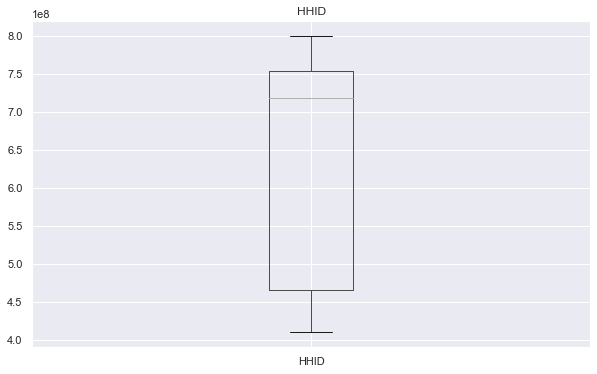

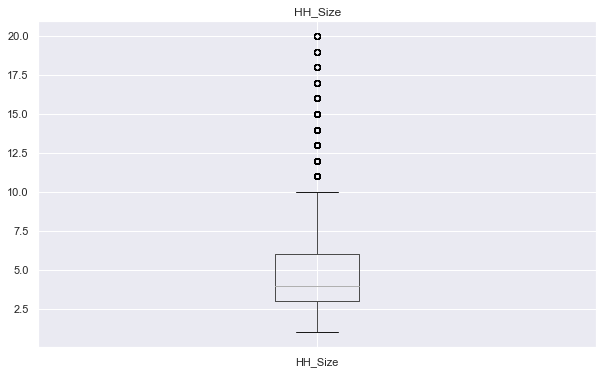

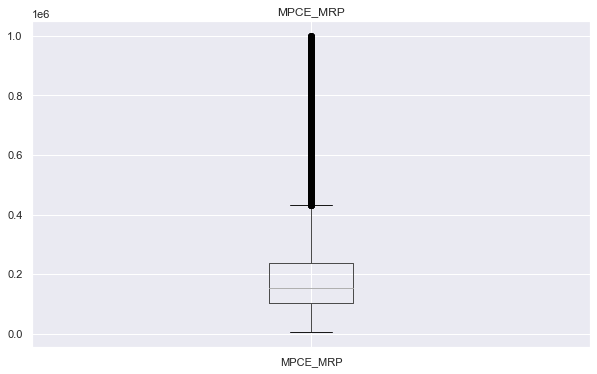

In [105]:
#Check Outliers
num_df = house.select_dtypes(exclude=['object'])
# Plot the variables (loop for plot variables) for num values
plt.figure(figsize=(10, 6))
for col in num_df:
    plt.figure(figsize=(10, 6))
    house.boxplot(column=[col])
    plt.title(col)
    plt.savefig(col+r'.png',bbox_inches='tight')

In [106]:
#we drop outliers 
house[(house['HH_Size'] >20)].shape
house[(house['MPCE_MRP'] >1000000)].shape



(0, 10)

In [107]:
house = house.drop(house[house['HH_Size'] >20].index)
house = house.drop(house[house['MPCE_MRP'] >1000000].index)


<Figure size 720x432 with 0 Axes>

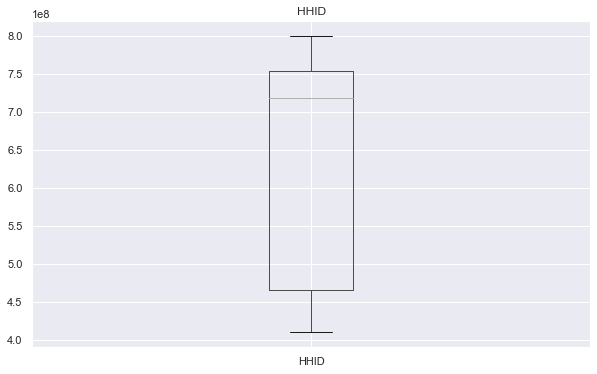

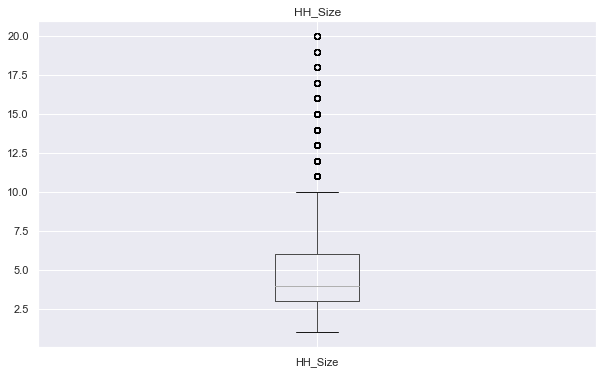

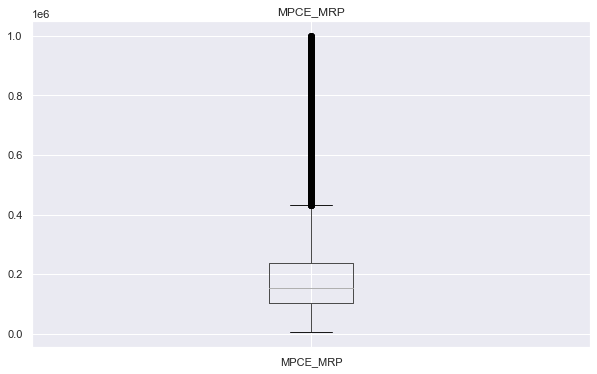

In [108]:
#Check Outliers
num_df = house.select_dtypes(exclude=['object'])
# Plot the variables (loop for plot variables) for num values
plt.figure(figsize=(10, 6))
for col in num_df:
    plt.figure(figsize=(10, 6))
    house.boxplot(column=[col])
    plt.title(col)
    plt.savefig(col+r'.png',bbox_inches='tight')

In [109]:
house.shape

(100661, 10)

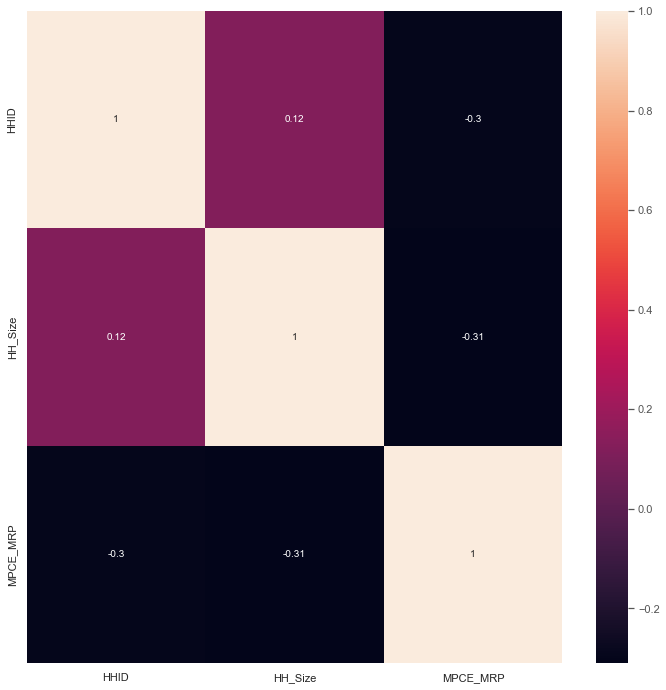

In [110]:
#check collinarity 
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

fig, ax = plt.subplots(figsize=(12,12))  
plt.style.use('ggplot')
ggplot_styles = {'axes.facecolor': '8d8d8d',} 
plt.rcParams.update(ggplot_styles)
ax =sns.heatmap(house.corr(), annot=True)

In [111]:
##Exporting File
file_url = r'C:\Users\Lenovo\Documents\INDE DATA\HOUSEHOLDNSS68CLEAN.csv'
house.to_csv(file_url,index = False)

# DATASET ON ALIMENTATION

In [122]:

file_url = r"C:\Users\Lenovo\Documents\INDE DATA\CEREALNSS68.csv"

cereal= pd.read_csv(file_url, on_bad_lines='skip', sep=";")
#We make a copy of the file and work on it
cereal = cereal.copy()
cereal.head(3)

,Round_Centre_code,FSU_Serial_no,Round,Sch_no,Sample,Sector,State_Region,District,Stratum,Sub_Stratum_No,Schedule_type,Sub_Round,Sub_Sample,FOD_Sub_Region,Hamlet_Group_Sub_Stratum_No,Second_Stage_Stratum_No,Sample_Hhld_No,Level,Filler,Item_Code,Home_Produce_Quantity,Home_Produce_Value,Total_Consumption_Quantity,Total_Consumption_Value,Source_Code,Special_Characters_for_Ok_Stamp,Blank,NSS,NSC,MLT,HHID,State_Code,District_code,Combined_multiplier,Subsample_multiplier
0,9,71558,68,10,central,rural,171,1,1,1,1,sub-round 1 : July - September 2011,1,1711.0,1,2,1,5,0,Rice-PDS(Kg),,,30000,420,only purchase,NaN,NaN,2,4,64816,715581201,MEGHALAYA,West Garo Hills,"324,08","648,16"
1,10,71558,68,10,central,rural,171,1,1,1,1,sub-round 1 : July - September 2011,1,1711.0,1,2,1,5,0,Rice-other sources(Kg),,,15000,255,only purchase,NaN,NaN,2,4,64816,715581201,MEGHALAYA,West Garo Hills,"324,08","648,16"
2,11,71558,68,10,central,rural,171,1,1,1,1,sub-round 1 : July - September 2011,1,1711.0,1,2,1,5,0,Muri(Kg),,,300,15,only purchase,NaN,NaN,2,4,64816,715581201,MEGHALAYA,West Garo Hills,"324,08","648,16"


In [124]:
cereal.shape

(5763152, 35)

In [125]:
cereal.columns

Index(['Round_Centre_code', 'FSU_Serial_no', 'Round', 'Sch_no', 'Sample',
       'Sector', 'State_Region', 'District', 'Stratum', 'Sub_Stratum_No',
       'Schedule_type', 'Sub_Round', 'Sub_Sample', 'FOD_Sub_Region',
       'Hamlet_Group_Sub_Stratum_No', 'Second_Stage_Stratum_No',
       'Sample_Hhld_No', 'Level', 'Filler', 'Item_Code',
       'Home_Produce_Quantity', 'Home_Produce_Value',
       'Total_Consumption_Quantity', 'Total_Consumption_Value', 'Source_Code',
       'Special_Characters_for_Ok_Stamp', 'Blank', 'NSS', 'NSC', 'MLT', 'HHID',
       'State_Code', 'District_code', 'Combined_multiplier',
       'Subsample_multiplier'],
      dtype='object')

In [126]:
cereal=cereal[['HHID', 'Item_Code', 'Total_Consumption_Quantity',
 'Total_Consumption_Value' ]]

In [127]:
cereal['Item_Code'].unique()

array(['Rice-PDS(Kg)', 'Rice-other sources(Kg)', 'Muri(Kg)',
       'bread(bakery)(Kg)', 'Cereal(s.t)',
       'Cereal Substitute : tapioca etc.', 'masur(Kg)',
       'other pulse products(Kg)', 'Pulses and Pulse Products(s.t)',
       'milk : liquid(litre)', 'Milk & Milk Products : s.t (160-167)',
       'salt', 'sugar - PDS', 'sugar - other sources',
       'salt & sugar : s.t(170-175)', 'mustard oil(Kg)',
       'edible oil  : others', 'edible oil  : s.t.(180-185)', 'eggs(no)',
       'fish, prawn(Kg)', 'beef / buffalo meat(Kg)', 'pork(Kg)',
       'chicken(Kg)', 'Egg,Fish & meat : s.t (190-196)', 'potato(Kg)',
       'onion(Kg)', 'brinjal(Kg)', 'palak/other leafy vegetables(Kg)',
       'green chillies(Kg)', 'gourd, pumpkin(Kg)', 'beans, barbati(Kg)',
       'other vegetables(Kg)', 'vegetables  : s.t (Kg) (200-217)',
       'banana (no.)', 'coconut(no.)', 'guava(Kg)', 'pears/nashpati(Kg)',
       'fruits(fresh) : s.t.(220-238)', 'other nuts(Kg)',
       'fruits (dry) : s.t. (240-24

In [128]:
#We need to reduce number of items, each one will be a columns
#I keep sub total for vegetable/cereal/fruit/pulse
#but for non vege and alcool/intoxicant, I will keep items, because political issue
#I will add s.t. to the item, to use them in my filter s.t

#i delete fuel and light because it is not alimentation



In [129]:
cereal['Item_Code'].replace({'toddy (litre)': 'toddy (l.) s.t', 'country liquor (litre)': 'country liquor (l.) s.t', 
'beer (litre)':'beer (l.) s.t' , 'foreign/ refined liquor or wine (litre)': 'foreign/ refined liquor or wine (l.) s.t', 
'eggs(no)': 'eggs(no) s.t', 'fish, prawn(Kg)': 'fish, prawn(Kg) s.t', 'goat meat /mutton(Kg)': 'goat meat /mutton(Kg) s.t',
'beef / buffalo meat(Kg)': 'beef / buffalo meat(Kg) s.t', 'pork(Kg)': 'pork(Kg) s.t', 'chicken(Kg)': 'chicken(Kg) s.t'}, inplace=True)



In [130]:
#creation filter to have selected items
filter = cereal['Item_Code'].str.contains('s.t')
filter

0          False
1          False
2          False
3          False
4           True
           ...  
5763147    False
5763148    False
5763149    False
5763150    False
5763151     True
Name: Item_Code, Length: 5763152, dtype: bool

In [131]:
food = cereal[filter]
food = food.drop(food[food['Item_Code'] == 'fuel and light : s.t. (330-345)'].index)
food = food.drop(food[food['Item_Code'] == 'intoxicants : s.t.(320-325)'].index)
food = food.drop(food[food['Item_Code']== "Egg,Fish & meat : s.t (190-196)"].index)

food['Item_Code'].value_counts()

Cereal(s.t)                                 99895
salt & sugar : s.t(170-175)                 99875
vegetables  : s.t (Kg) (200-217)            99698
spices : s.t  (250-261)                     99452
edible oil  : s.t.(180-185)                 99261
beverages : s.t (270-277)                   98703
Pulses and Pulse Products(s.t)              98537
packaged processed food : s.t.(290-296)     90199
Milk & Milk Products : s.t (160-167)        88291
fruits(fresh) : s.t.(220-238)               85998
tobacco  : s.t. (310-317)                   50661
eggs(no) s.t                                44304
chicken(Kg) s.t                             41002
fruits (dry) : s.t. (240-247)               39322
fish, prawn(Kg) s.t                         37620
pan : s.t.(300-302)                         28411
goat meat /mutton(Kg) s.t                   16499
beef / buffalo meat(Kg) s.t                  9711
country liquor (l.) s.t                      8094
foreign/ refined liquor or wine (l.) s.t     5828


In [132]:
#rename columns
food['Item_Code'].replace({"beverages : s.t (270-277)": "coffee, tea, juice","fruits(fresh) : s.t.(220-238)":"fruits_fresh", "fruits (dry) : s.t. (240-247)":"fruits_dry)" }, inplace=True)


In [133]:
#delete special caractere
food['Item_Code']=food['Item_Code'].replace(to_replace=r's.t[^|]*$', value='', regex=True).str.strip('():')

In [137]:
#delete special caractere
food['Item_Code']=food['Item_Code'].replace(to_replace=r'\s*\([^:()]*', value='', regex=True).str.strip('):')

In [138]:
#delete special caractere
food['Item_Code']=food['Item_Code'].replace(to_replace=r'\s*\([^:()]*', value='', regex=True).str.strip(' ')

In [139]:
food['Item_Code'].value_counts()

Cereal                             99895
salt & sugar                       99875
vegetables                         99698
spices                             99452
edible oil                         99261
coffee, tea, juice                 98703
Pulses and Pulse Products          98537
packaged processed food            90199
Milk & Milk Products               88291
fruits_fresh                       85998
tobacco                            50661
eggs                               44304
chicken                            41002
fruits_dry                         39322
fish, prawn                        37620
pan                                28411
goat meat /mutton                  16499
beef / buffalo meat                 9711
country liquor                      8094
foreign/ refined liquor or wine     5828
pork                                5566
beer                                2193
toddy                               1498
Name: Item_Code, dtype: int64

In [140]:
food.dtypes

HHID                           int64
Item_Code                     object
Total_Consumption_Quantity    object
Total_Consumption_Value        int64
dtype: object

In [142]:
food["Total_Consumption_Quantity"] = pd.to_numeric(food["Total_Consumption_Quantity"], errors='coerce')

In [143]:
food.isna().sum()

HHID                               0
Item_Code                          0
Total_Consumption_Quantity    541961
Total_Consumption_Value            0
dtype: int64

In [144]:
#ON THIS DATA WILL USE ONLY VALUE 
food.drop(columns=['Total_Consumption_Quantity'], inplace=True)

In [145]:
## Check for duplicates
food.duplicated().any()

False

In [146]:
food.shape

(1250618, 3)

<Figure size 720x432 with 0 Axes>

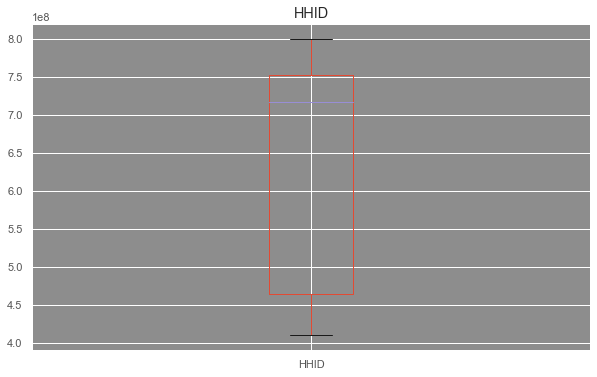

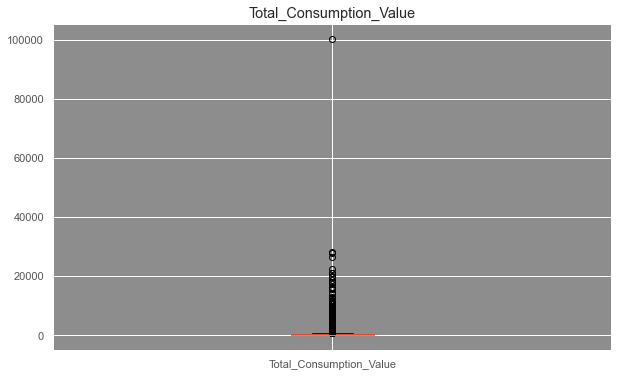

In [147]:
#Check Outliers
num_df = food.select_dtypes(exclude=['object'])
# Plot the variables (loop for plot variables) for num values
plt.figure(figsize=(10, 6))
for col in num_df:
    plt.figure(figsize=(10, 6))
    food.boxplot(column=[col])
    plt.title(col)
    plt.savefig(col+r'.png',bbox_inches='tight')

In [148]:
food = food.drop(food[food['Total_Consumption_Value'] >20000].index)

In [149]:
food.head()

,HHID,Item_Code,Total_Consumption_Value
4,715581201,Cereal,750
8,715581201,Pulses and Pulse Products,120
10,715581201,Milk & Milk Products,300
14,715581201,salt & sugar,142
17,715581201,edible oil,90


In [150]:
##Exporting File
file_url2 = r'C:\Users\Lenovo\Documents\INDE DATA\FOODVALUENSS68CLEAN.csv'
data.to_csv(file_url2,index = False)

# Merge the two dataset

In [151]:
house.shape

(100661, 10)

In [152]:
food.shape

(1250609, 3)

### transformation of dataset food, to have items in columns, and unique ID 

In [153]:
foodpivot= pd.pivot_table(food, values='Total_Consumption_Value', index=['HHID'], 
                    columns=['Item_Code'], aggfunc=np.sum, fill_value=None)
foodpivot

Item_Code,Cereal,Milk & Milk Products,Pulses and Pulse Products,beef / buffalo meat,beer,chicken,"coffee, tea, juice",country liquor,edible oil,eggs,"fish, prawn",foreign/ refined liquor or wine,fruits_dry,fruits_fresh,goat meat /mutton,packaged processed food,pan,pork,salt & sugar,spices,tobacco,toddy,vegetables
HHID,,,,,,,,,,,,,,,,,,,,,,,
410001101,1060.0,1710.0,382.0,NaN,NaN,NaN,425.0,NaN,750.0,NaN,NaN,NaN,40.0,20.0,840.0,NaN,NaN,NaN,146.0,182.0,450.0,NaN,740.0
410001102,470.0,645.0,245.0,NaN,NaN,NaN,63.0,NaN,200.0,24.0,NaN,NaN,410.0,310.0,NaN,35.0,NaN,NaN,160.0,167.0,NaN,NaN,333.0
410001103,1087.0,1520.0,320.0,NaN,NaN,NaN,425.0,NaN,760.0,96.0,NaN,NaN,80.0,140.0,150.0,NaN,NaN,NaN,389.0,312.0,2000.0,NaN,938.0
410001201,580.0,630.0,381.0,NaN,NaN,140.0,275.0,NaN,280.0,96.0,NaN,NaN,423.0,140.0,280.0,210.0,NaN,NaN,183.0,195.0,300.0,NaN,431.0
410001202,587.0,1710.0,180.0,NaN,NaN,NaN,662.0,NaN,225.0,80.0,NaN,NaN,40.0,20.0,NaN,500.0,NaN,NaN,134.0,198.0,450.0,NaN,532.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799981301,640.0,1800.0,138.0,NaN,NaN,NaN,50.0,NaN,340.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.0,82.0,58.0,NaN,155.0
799982101,765.0,600.0,195.0,NaN,NaN,NaN,75.0,NaN,170.0,36.0,NaN,NaN,NaN,NaN,NaN,90.0,NaN,NaN,47.0,103.0,25.0,NaN,245.0
799982201,490.0,1200.0,230.0,NaN,NaN,110.0,100.0,NaN,255.0,NaN,NaN,NaN,NaN,20.0,NaN,60.0,NaN,NaN,39.0,103.0,50.0,NaN,226.0


In [154]:
foodpivot = foodpivot.reset_index()

In [155]:
foodpivot.shape

(101540, 24)

In [156]:
## Check for duplicates
foodpivot.duplicated().any()

False

In [157]:
foodpivot.isna().sum()

Item_Code
HHID                                    0
Cereal                               1645
Milk & Milk Products                13252
Pulses and Pulse Products            3003
beef / buffalo meat                 91829
beer                                99347
chicken                             60538
coffee, tea, juice                   2837
country liquor                      93446
edible oil                           2279
eggs                                57236
fish, prawn                         63920
foreign/ refined liquor or wine     95713
fruits_dry                          62219
fruits_fresh                        15542
goat meat /mutton                   85042
packaged processed food             11344
pan                                 73129
pork                                95974
salt & sugar                         1665
spices                               2088
tobacco                             50879
toddy                              100042
vegetables              

In [158]:
foodpivot.dtypes

Item_Code
HHID                                 int64
Cereal                             float64
Milk & Milk Products               float64
Pulses and Pulse Products          float64
beef / buffalo meat                float64
beer                               float64
chicken                            float64
coffee, tea, juice                 float64
country liquor                     float64
edible oil                         float64
eggs                               float64
fish, prawn                        float64
foreign/ refined liquor or wine    float64
fruits_dry                         float64
fruits_fresh                       float64
goat meat /mutton                  float64
packaged processed food            float64
pan                                float64
pork                               float64
salt & sugar                       float64
spices                             float64
tobacco                            float64
toddy                              float64
v

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_7824/2321621296.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10, 6))


<Figure size 720x432 with 0 Axes>

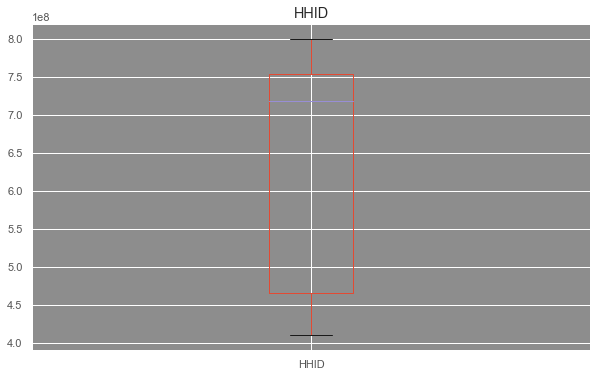

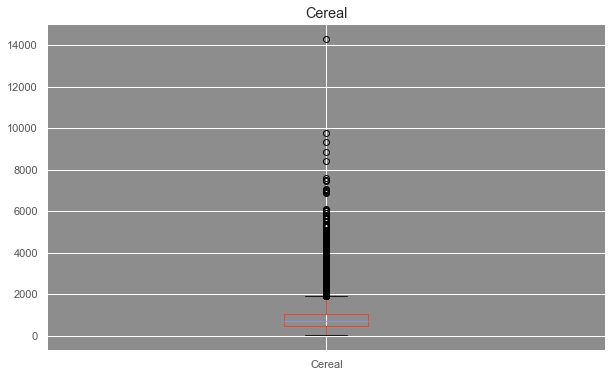

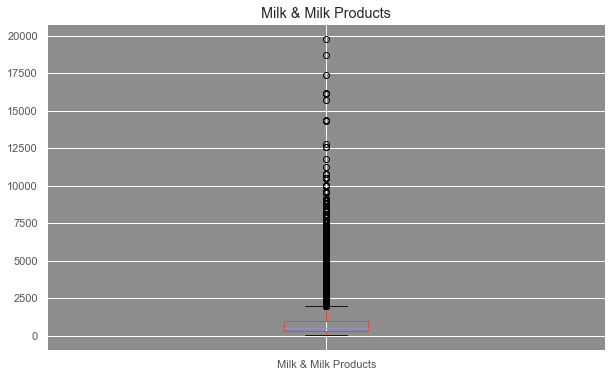

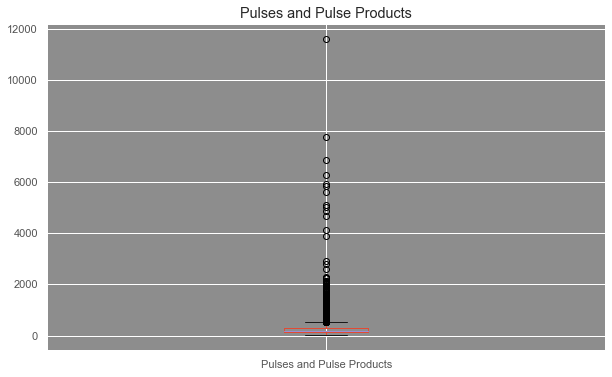

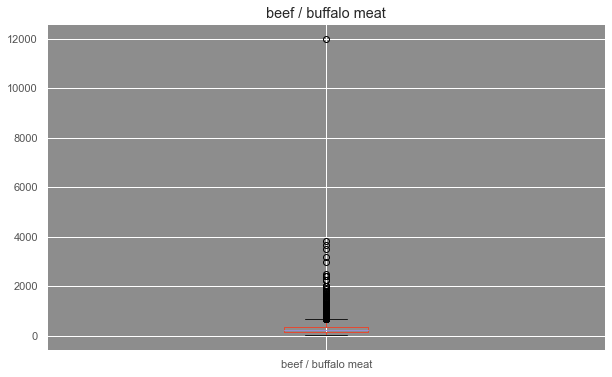

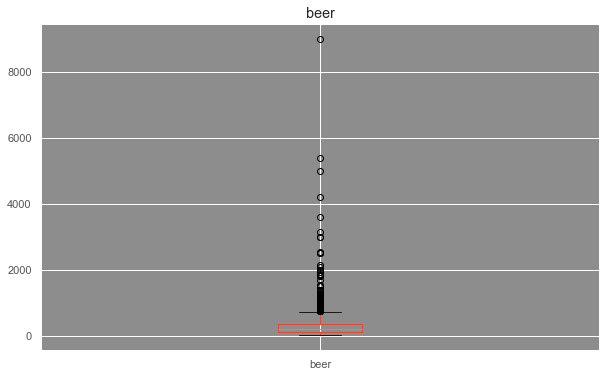

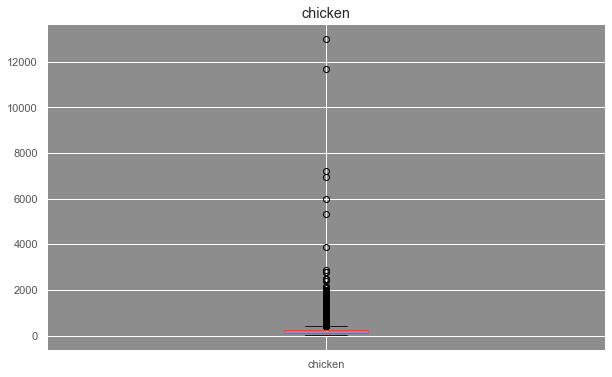

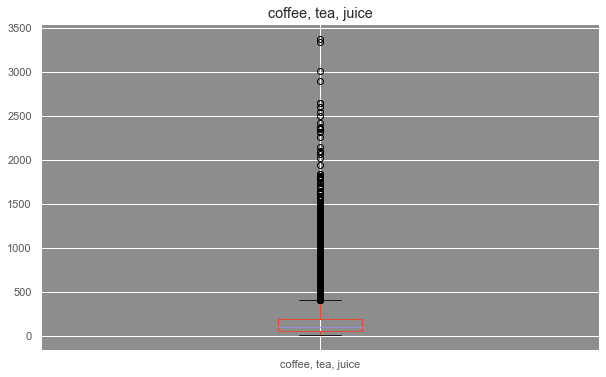

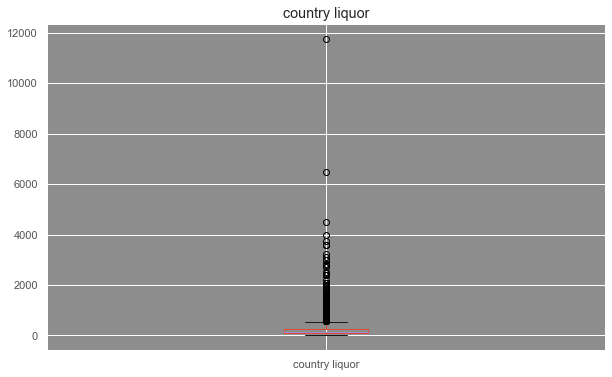

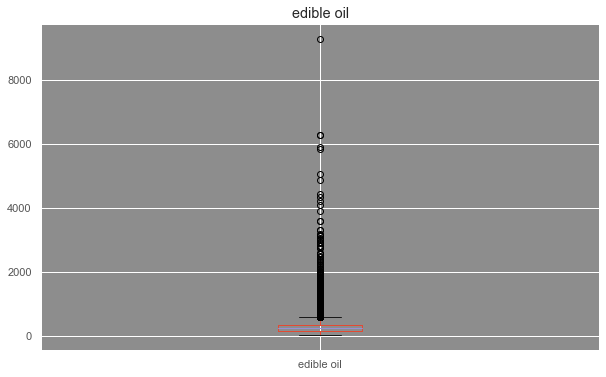

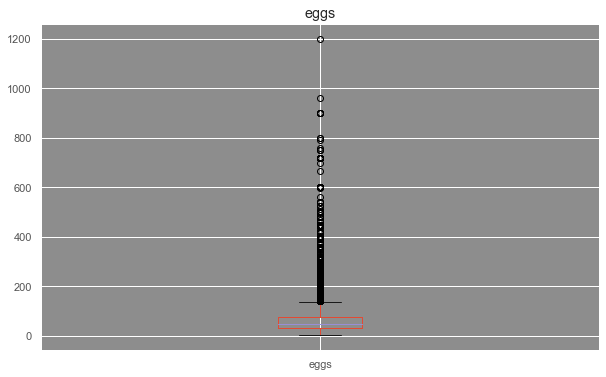

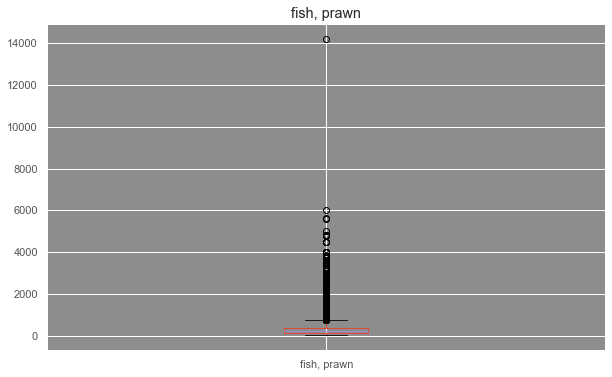

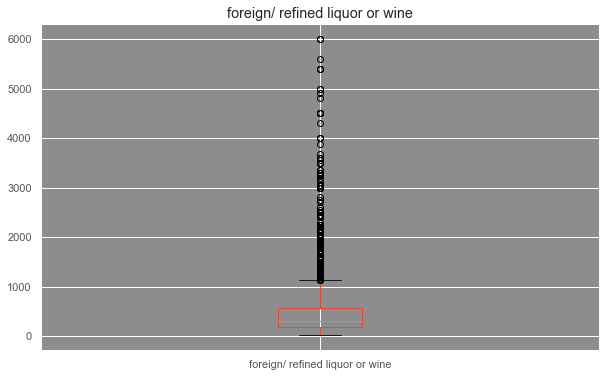

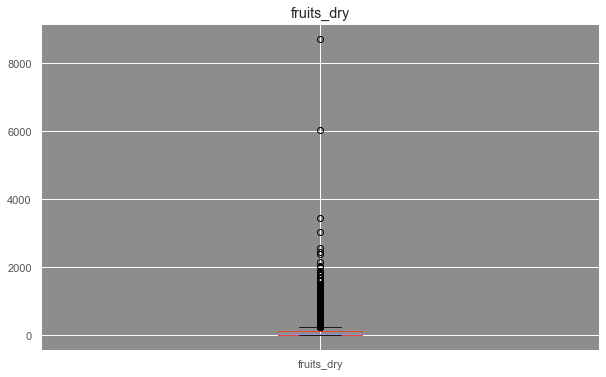

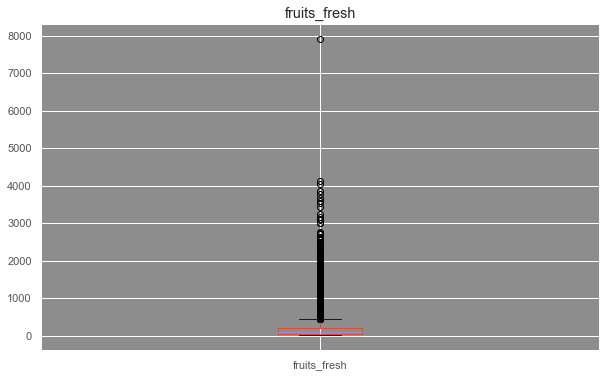

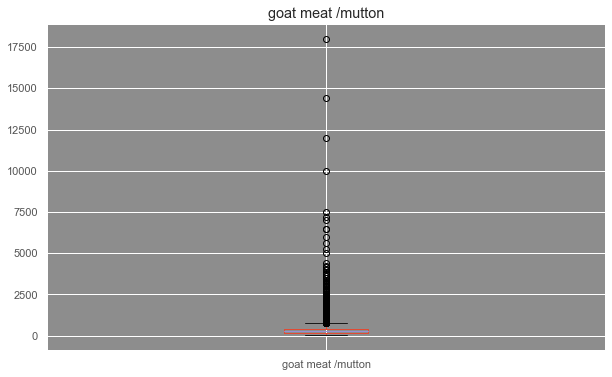

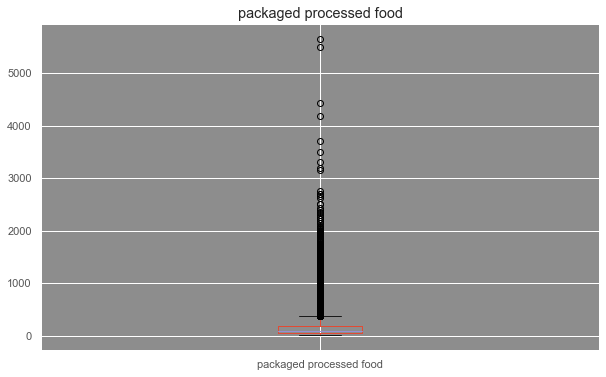

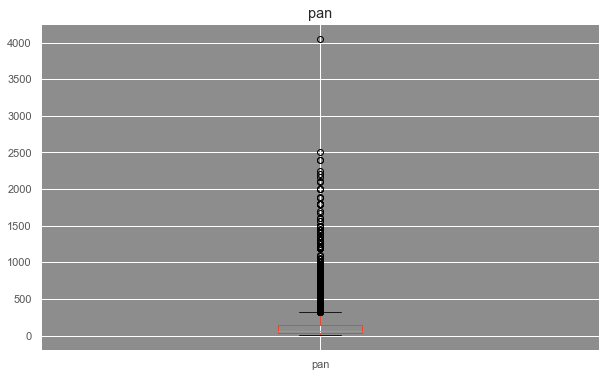

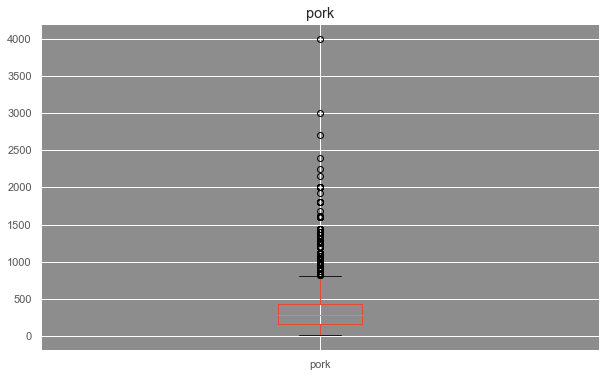

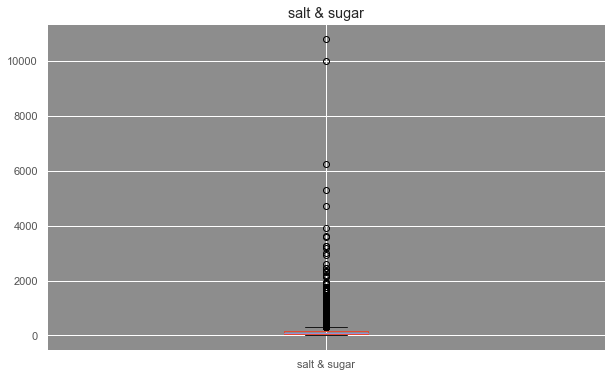

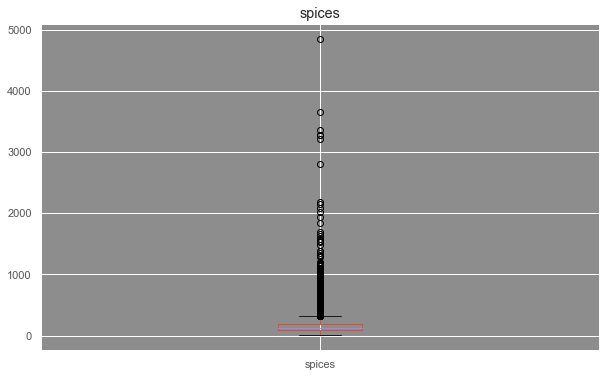

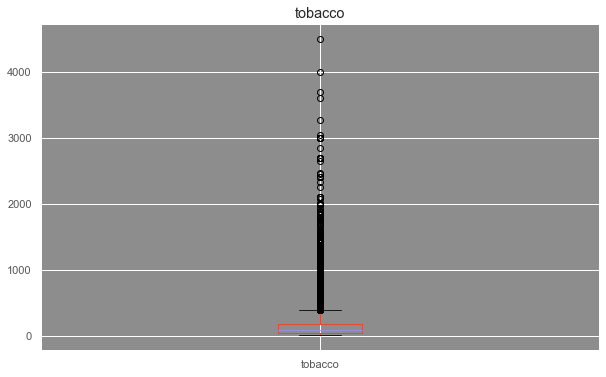

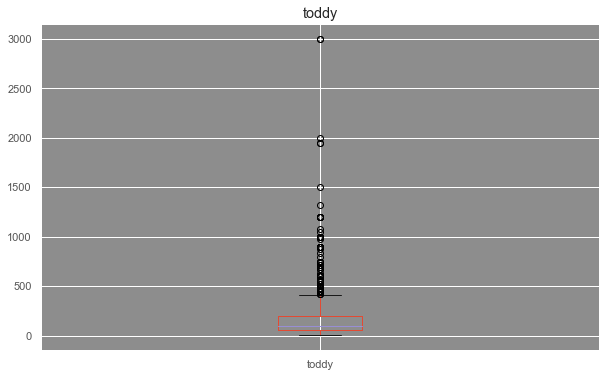

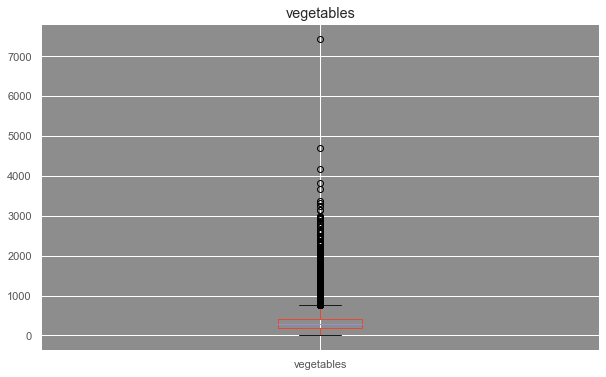

In [159]:
#Check Outliers
num_df = foodpivot.select_dtypes(exclude=['object'])
# Plot the variables (loop for plot variables) for num values
plt.figure(figsize=(10, 6))
for col in num_df:
    plt.figure(figsize=(10, 6))
    foodpivot.boxplot(column=[col])
    plt.title(col)

In [160]:
foodpivot.columns

Index(['HHID', 'Cereal', 'Milk & Milk Products', 'Pulses and Pulse Products',
       'beef / buffalo meat', 'beer', 'chicken', 'coffee, tea, juice',
       'country liquor', 'edible oil', 'eggs', 'fish, prawn',
       'foreign/ refined liquor or wine', 'fruits_dry', 'fruits_fresh',
       'goat meat /mutton', 'packaged processed food', 'pan', 'pork',
       'salt & sugar', 'spices', 'tobacco', 'toddy', 'vegetables'],
      dtype='object', name='Item_Code')

In [161]:
#dropoutliers
foodpivot = foodpivot.drop(foodpivot[foodpivot['fruits_fresh'] >5000].index)
foodpivot = foodpivot.drop(foodpivot[foodpivot['packaged processed food'] >4000].index)
foodpivot = foodpivot.drop(foodpivot[foodpivot['pan'] >3000].index)
foodpivot = foodpivot.drop(foodpivot[foodpivot['tobacco'] >3500].index)
foodpivot = foodpivot.drop(foodpivot[foodpivot['vegetables'] >4500].index)


foodpivot = foodpivot.drop(foodpivot[foodpivot['Cereal'] >8000].index)

foodpivot = foodpivot.drop(foodpivot[foodpivot['Pulses and Pulse Products'] >8000].index)

foodpivot = foodpivot.drop(foodpivot[foodpivot['beef / buffalo meat'] >4000].index)

foodpivot = foodpivot.drop(foodpivot[foodpivot['beer'] >3000].index)

foodpivot = foodpivot.drop(foodpivot[foodpivot['chicken'] >4000].index)

foodpivot = foodpivot.drop(foodpivot[foodpivot['country liquor'] >4000].index)
foodpivot = foodpivot.drop(foodpivot[foodpivot['edible oil'] >5000].index)

foodpivot = foodpivot.drop(foodpivot[foodpivot['eggs'] >800].index)

foodpivot = foodpivot.drop(foodpivot[foodpivot['fish, prawn'] >5000].index)

foodpivot = foodpivot.drop(foodpivot[foodpivot['foreign/ refined liquor or wine'] >4000].index)

foodpivot = foodpivot.drop(foodpivot[foodpivot['fruits_dry'] >3000].index)


foodpivot = foodpivot.drop(foodpivot[foodpivot['goat meat /mutton'] >8000].index)


foodpivot = foodpivot.drop(foodpivot[foodpivot['pork'] >2500].index)

foodpivot = foodpivot.drop(foodpivot[foodpivot['salt & sugar'] >4000].index)

foodpivot = foodpivot.drop(foodpivot[foodpivot['spices'] >2500].index)

foodpivot = foodpivot.drop(foodpivot[foodpivot['toddy'] >1500].index)

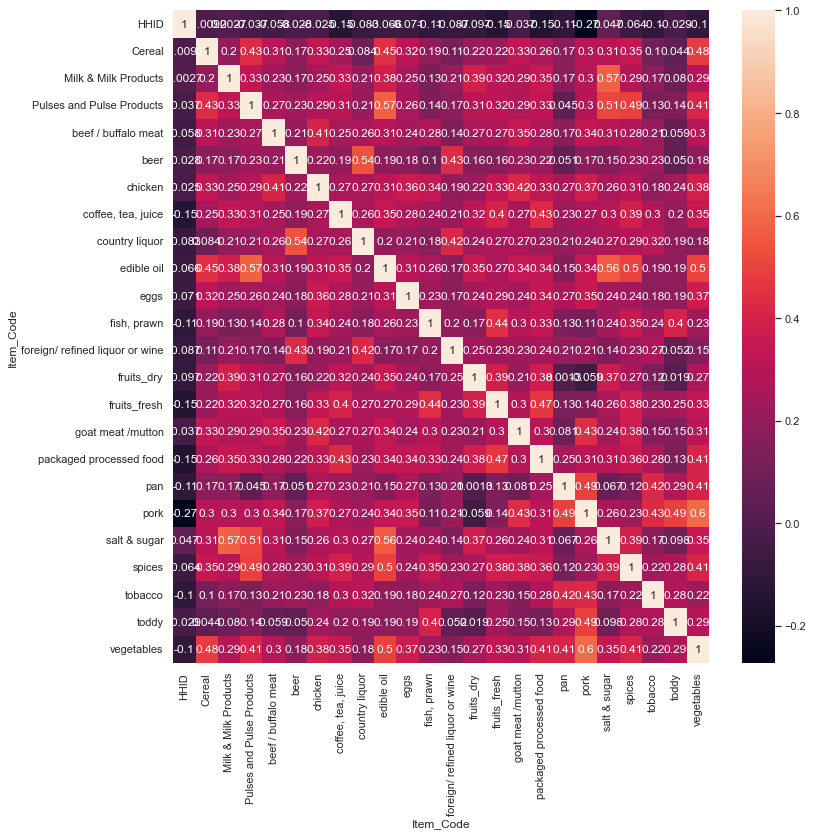

In [162]:
#check collanarity
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

fig, ax = plt.subplots(figsize=(12,12))  
ax =sns.heatmap(foodpivot.corr(), annot=True)

### merge the two data set on HHID

In [163]:
# MERGE
merge= pd.merge(house,foodpivot, on = 'HHID')
merge

,HHID,Sector,HH_Size,Religion,Social_Group,whether_Land_owned,State_code,Regular_salary_earner,Possess_ration_card,MPCE_MRP,Cereal,Milk & Milk Products,Pulses and Pulse Products,beef / buffalo meat,beer,chicken,"coffee, tea, juice",country liquor,edible oil,eggs,"fish, prawn",foreign/ refined liquor or wine,fruits_dry,fruits_fresh,goat meat /mutton,packaged processed food,pan,pork,salt & sugar,spices,tobacco,toddy,vegetables
0,715581201,rural,5,Christianity,Scheduled Tribes,Yes,MEGHALAYA,no,yes,119468,750.0,300.0,120.0,140.0,NaN,210.0,130.0,240.0,90.0,24.0,290.0,NaN,20.0,95.0,NaN,120.0,120.0,150.0,142.0,90.0,270.0,NaN,470.0
1,715581202,rural,2,Christianity,Scheduled Tribes,Yes,MEGHALAYA,no,yes,223878,270.0,212.0,60.0,280.0,200.0,270.0,110.0,NaN,88.0,NaN,170.0,NaN,30.0,80.0,NaN,70.0,120.0,150.0,89.0,59.0,258.0,NaN,390.0
2,715581203,rural,2,Christianity,Scheduled Tribes,Yes,MEGHALAYA,no,yes,198586,374.0,65.0,60.0,NaN,NaN,100.0,110.0,240.0,90.0,100.0,240.0,NaN,NaN,62.0,NaN,139.0,65.0,160.0,114.0,73.0,300.0,NaN,290.0
3,715581204,rural,1,Islam,Scheduled Tribes,Yes,MEGHALAYA,no,yes,355752,140.0,240.0,45.0,140.0,NaN,160.0,80.0,300.0,45.0,NaN,190.0,NaN,NaN,55.0,NaN,60.0,65.0,150.0,57.0,67.0,264.0,NaN,288.0
4,715581301,rural,6,Christianity,Scheduled Tribes,Yes,MEGHALAYA,no,yes,79006,869.0,95.0,90.0,NaN,NaN,100.0,145.0,240.0,110.0,46.0,360.0,NaN,NaN,80.0,NaN,105.0,53.0,130.0,141.0,75.0,60.0,NaN,344.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100492,454191104,urban,3,Islam,Other Backward Classes,No,PONDICHERRY,yes,yes,366464,576.0,516.0,167.0,NaN,NaN,110.0,408.0,NaN,290.0,69.0,180.0,NaN,NaN,185.0,200.0,55.0,NaN,NaN,80.0,266.0,NaN,NaN,364.0
100493,454191201,urban,3,Islam,Other Backward Classes,No,PONDICHERRY,no,no,452463,610.0,1535.0,222.0,NaN,NaN,220.0,278.0,NaN,195.0,66.0,170.0,NaN,NaN,123.0,NaN,12.0,NaN,NaN,103.0,144.0,1050.0,NaN,214.0
100494,454191202,urban,6,Islam,Other Backward Classes,Yes,PONDICHERRY,yes,yes,171808,920.0,1120.0,362.0,NaN,NaN,275.0,427.0,NaN,375.0,96.0,250.0,NaN,NaN,359.0,NaN,235.0,NaN,NaN,79.0,330.0,NaN,NaN,617.0
100495,454191203,urban,3,Islam,Other Backward Classes,Yes,PONDICHERRY,yes,yes,223069,593.0,815.0,212.0,NaN,NaN,115.0,316.0,NaN,314.0,66.0,240.0,NaN,NaN,153.0,100.0,155.0,NaN,NaN,82.0,260.0,NaN,NaN,373.0


In [164]:
merge.shape

(100497, 33)

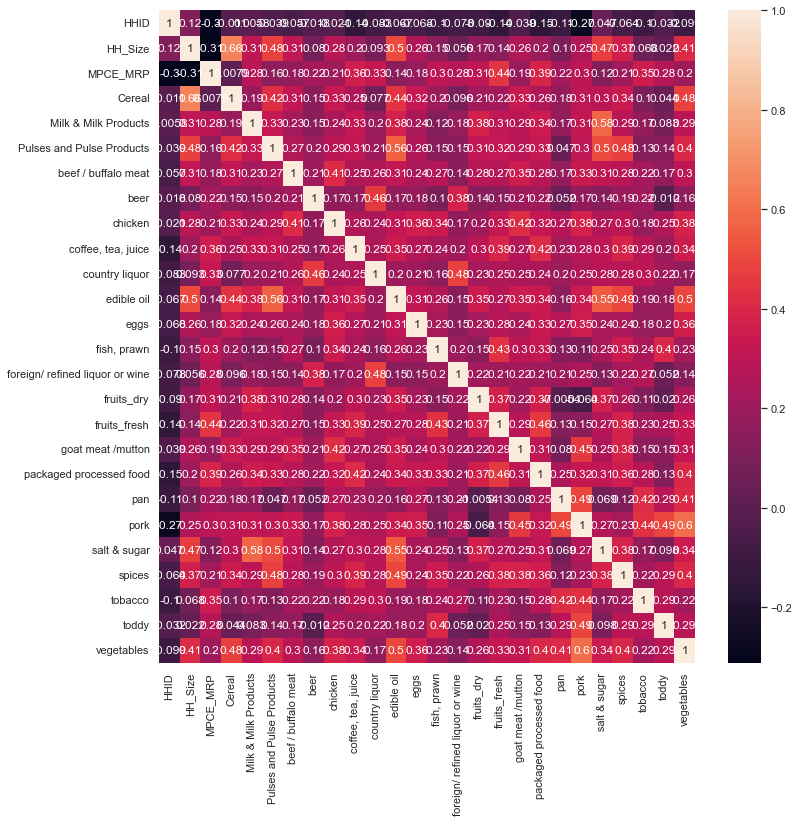

In [165]:
#check collinarity again
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

fig, ax = plt.subplots(figsize=(12,12))  
ax =sns.heatmap(merge.corr(), annot=True)

In [166]:
##Exporting File
file_url3 = r'C:\Users\Lenovo\Documents\INDE DATA\MERGEVALUEFOODHOUSEHOLDNSS68.csv'
merge.to_csv(file_url3,index = False)

In [167]:
merge

,HHID,Sector,HH_Size,Religion,Social_Group,whether_Land_owned,State_code,Regular_salary_earner,Possess_ration_card,MPCE_MRP,Cereal,Milk & Milk Products,Pulses and Pulse Products,beef / buffalo meat,beer,chicken,"coffee, tea, juice",country liquor,edible oil,eggs,"fish, prawn",foreign/ refined liquor or wine,fruits_dry,fruits_fresh,goat meat /mutton,packaged processed food,pan,pork,salt & sugar,spices,tobacco,toddy,vegetables
0,715581201,rural,5,Christianity,Scheduled Tribes,Yes,MEGHALAYA,no,yes,119468,750.0,300.0,120.0,140.0,NaN,210.0,130.0,240.0,90.0,24.0,290.0,NaN,20.0,95.0,NaN,120.0,120.0,150.0,142.0,90.0,270.0,NaN,470.0
1,715581202,rural,2,Christianity,Scheduled Tribes,Yes,MEGHALAYA,no,yes,223878,270.0,212.0,60.0,280.0,200.0,270.0,110.0,NaN,88.0,NaN,170.0,NaN,30.0,80.0,NaN,70.0,120.0,150.0,89.0,59.0,258.0,NaN,390.0
2,715581203,rural,2,Christianity,Scheduled Tribes,Yes,MEGHALAYA,no,yes,198586,374.0,65.0,60.0,NaN,NaN,100.0,110.0,240.0,90.0,100.0,240.0,NaN,NaN,62.0,NaN,139.0,65.0,160.0,114.0,73.0,300.0,NaN,290.0
3,715581204,rural,1,Islam,Scheduled Tribes,Yes,MEGHALAYA,no,yes,355752,140.0,240.0,45.0,140.0,NaN,160.0,80.0,300.0,45.0,NaN,190.0,NaN,NaN,55.0,NaN,60.0,65.0,150.0,57.0,67.0,264.0,NaN,288.0
4,715581301,rural,6,Christianity,Scheduled Tribes,Yes,MEGHALAYA,no,yes,79006,869.0,95.0,90.0,NaN,NaN,100.0,145.0,240.0,110.0,46.0,360.0,NaN,NaN,80.0,NaN,105.0,53.0,130.0,141.0,75.0,60.0,NaN,344.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100492,454191104,urban,3,Islam,Other Backward Classes,No,PONDICHERRY,yes,yes,366464,576.0,516.0,167.0,NaN,NaN,110.0,408.0,NaN,290.0,69.0,180.0,NaN,NaN,185.0,200.0,55.0,NaN,NaN,80.0,266.0,NaN,NaN,364.0
100493,454191201,urban,3,Islam,Other Backward Classes,No,PONDICHERRY,no,no,452463,610.0,1535.0,222.0,NaN,NaN,220.0,278.0,NaN,195.0,66.0,170.0,NaN,NaN,123.0,NaN,12.0,NaN,NaN,103.0,144.0,1050.0,NaN,214.0
100494,454191202,urban,6,Islam,Other Backward Classes,Yes,PONDICHERRY,yes,yes,171808,920.0,1120.0,362.0,NaN,NaN,275.0,427.0,NaN,375.0,96.0,250.0,NaN,NaN,359.0,NaN,235.0,NaN,NaN,79.0,330.0,NaN,NaN,617.0
100495,454191203,urban,3,Islam,Other Backward Classes,Yes,PONDICHERRY,yes,yes,223069,593.0,815.0,212.0,NaN,NaN,115.0,316.0,NaN,314.0,66.0,240.0,NaN,NaN,153.0,100.0,155.0,NaN,NaN,82.0,260.0,NaN,NaN,373.0


In [168]:
pd.crosstab(merge.State_code, merge['Social_Group'])

Social_Group,Other Backward Classes,Others,Scheduled Castes,Scheduled Tribes
State_code,,,,
A & N ISLANDS,76,392,2,62
ANDHRA PRADESH,3505,1833,1130,358
ARUNACHAL PRADESH,40,453,35,1134
ASSAM,916,1524,390,595
BIHAR,2757,1026,715,61
CHANDIGARH,66,177,52,2
CHATTISGARH,938,291,281,647
D & N HAVELI,20,60,3,108
DAMAN & DIU,73,30,10,14
